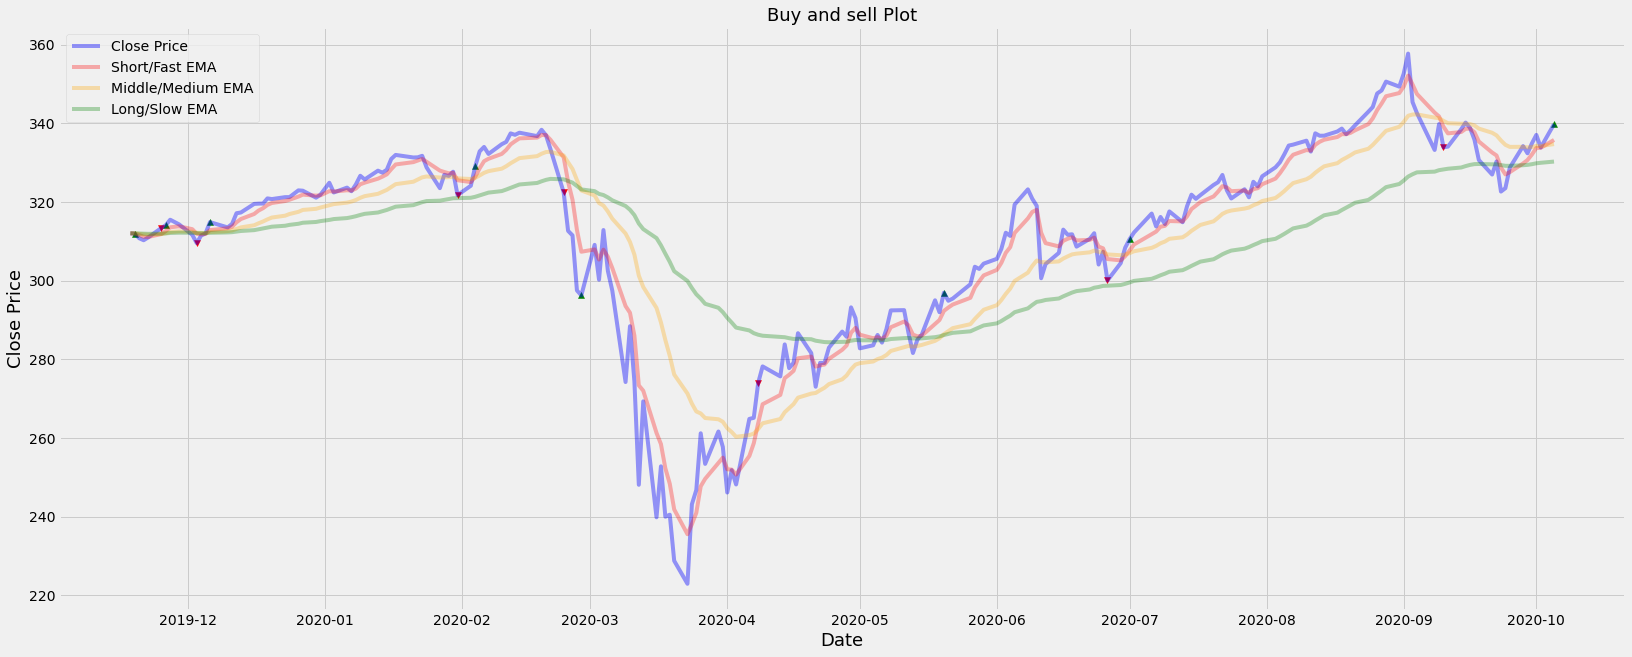

In [1]:
# Description: This program uses the 3 moving average crossover strategy to 
# determine when to buy and sell stock

# Import libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

stock = 'SPY'

# Load the data
df = web.DataReader(stock, 'yahoo', start='2019-11-18')

# Calculate the 3 moving averages

# Calculate the short/fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()
# Calculate the middle/medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the long/slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()

# Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

# Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

# Add the buy and sell signals to the Data Set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

# Visually show the stock buy and sell signals
plt.figure(figsize=(25, 10))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Buy and sell Plot', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=.4)
plt.plot(ShortEMA, label='Short/Fast EMA', color='red', alpha=.3)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange', alpha=.3)
plt.plot(LongEMA, label='Long/Slow EMA', color='green', alpha=.3)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha= 1)
plt.legend()
plt.show()